In [1]:
#OBJ1-->Data Cleaning & Preprocessing 
import pandas as pd
import numpy as np


In [2]:
df = pd.read_csv(r"C:\Users\debmr\Downloads\tuberculosis_xray_dataset.csv")  
df.head()

,Patient_ID,Age,Gender,Chest_Pain,Cough_Severity,Breathlessness,Fatigue,Weight_Loss,Fever,Night_Sweats,Sputum_Production,Blood_in_Sputum,Smoking_History,Previous_TB_History,Class
0,PID000001,69,Male,Yes,1,2,3,2.37,Moderate,Yes,Medium,Yes,Former,Yes,Normal
1,PID000002,32,Female,Yes,3,0,9,6.09,Moderate,No,Medium,No,Current,Yes,Normal
2,PID000003,89,Male,No,7,0,3,2.86,Mild,Yes,Medium,No,Current,No,Tuberculosis
3,PID000004,78,Female,Yes,2,0,6,4.57,Moderate,No,High,Yes,Never,Yes,Tuberculosis
4,PID000005,38,Male,No,7,2,5,13.86,High,Yes,Low,No,Never,Yes,Tuberculosis


In [3]:
df.isnull().sum()


Patient_ID             0
Age                    0
Gender                 0
Chest_Pain             0
Cough_Severity         0
Breathlessness         0
Fatigue                0
Weight_Loss            0
Fever                  0
Night_Sweats           0
Sputum_Production      0
Blood_in_Sputum        0
Smoking_History        0
Previous_TB_History    0
Class                  0
dtype: int64

In [4]:
print("Duplicate Rows:", df.duplicated().sum())  


Duplicate Rows: 0


In [9]:
df.dtypes


Patient_ID              object
Age                      int64
Gender                  object
Chest_Pain              object
Cough_Severity           int64
Breathlessness           int64
Fatigue                  int64
Weight_Loss            float64
Fever                   object
Night_Sweats            object
Sputum_Production       object
Blood_in_Sputum         object
Smoking_History         object
Previous_TB_History     object
Class                   object
dtype: object

In [11]:
df = df[(df['Age'] > 0) & (df['Age'] <= 120)]
df

,Patient_ID,Age,Gender,Chest_Pain,Cough_Severity,Breathlessness,Fatigue,Weight_Loss,Fever,Night_Sweats,Sputum_Production,Blood_in_Sputum,Smoking_History,Previous_TB_History,Class
0,PID000001,69,Male,Yes,1,2,3,2.37,Moderate,Yes,Medium,Yes,Former,Yes,Normal
1,PID000002,32,Female,Yes,3,0,9,6.09,Moderate,No,Medium,No,Current,Yes,Normal
2,PID000003,89,Male,No,7,0,3,2.86,Mild,Yes,Medium,No,Current,No,Tuberculosis
3,PID000004,78,Female,Yes,2,0,6,4.57,Moderate,No,High,Yes,Never,Yes,Tuberculosis
4,PID000005,38,Male,No,7,2,5,13.86,High,Yes,Low,No,Never,Yes,Tuberculosis
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,PID019996,53,Male,No,0,4,6,11.72,Moderate,Yes,Medium,No,Never,Yes,Normal
19996,PID019997,27,Female,No,3,1,1,5.67,Moderate,Yes,Low,Yes,Current,Yes,Tuberculosis
19997,PID019998,23,Male,No,1,2,8,3.91,High,Yes,Low,Yes,Never,No,Normal
19998,PID019999,24,Female,No,8,4,6,8.77,Moderate,Yes,Medium,Yes,Never,Yes,Normal


In [13]:
print(df['Chest_Pain'].unique())  
print(df['Cough_Severity'].unique())
print(df['Breathlessness'].unique())


['Yes' 'No']
[1 3 7 2 0 5 8 9 6 4]
[2 0 3 1 4]


In [15]:
##OBJ2-->Descriptive Statistical Analysis  
df.describe()


,Age,Cough_Severity,Breathlessness,Fatigue,Weight_Loss
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,53.467450,4.491350,2.003450,4.508450,7.455281
std,20.773984,2.864723,1.417123,2.881552,4.339864
min,18.000000,0.000000,0.000000,0.000000,0.000000
25%,35.000000,2.000000,1.000000,2.000000,3.640000
50%,53.000000,4.000000,2.000000,5.000000,7.490000
75%,71.000000,7.000000,3.000000,7.000000,11.200000
max,89.000000,9.000000,4.000000,9.000000,15.000000


In [17]:
mean_age = df['Age'].mean()
print("Mean Age of Patients:", mean_age)


Mean Age of Patients: 53.46745


In [19]:
df['Gender'].value_counts()


Gender
Male      10171
Female     9829
Name: count, dtype: int64

In [21]:
df[['Cough_Severity', 'Breathlessness', 'Fatigue']].mean()


Cough_Severity    4.49135
Breathlessness    2.00345
Fatigue           4.50845
dtype: float64

In [23]:
df['Smoking_History'].value_counts()


Smoking_History
Former     6791
Never      6616
Current    6593
Name: count, dtype: int64

In [25]:
df['Class'].value_counts()


Class
Normal          14082
Tuberculosis     5918
Name: count, dtype: int64

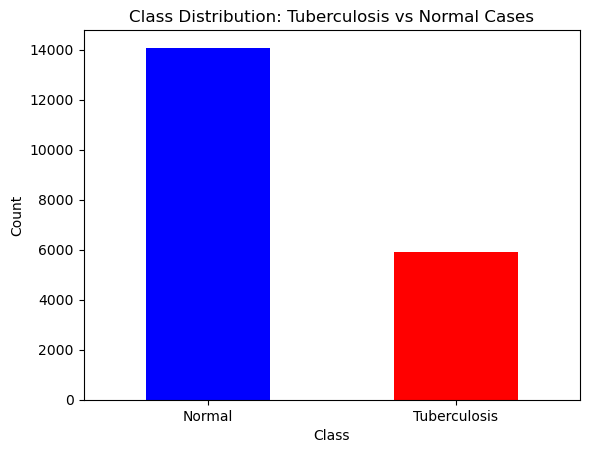

In [27]:
##OBJ3-->Class Distribution Analysis  

import matplotlib.pyplot as plt

df['Class'].value_counts().plot(kind='bar', color=['blue', 'red'])
plt.title("Class Distribution: Tuberculosis vs Normal Cases")
plt.xlabel("Class")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()


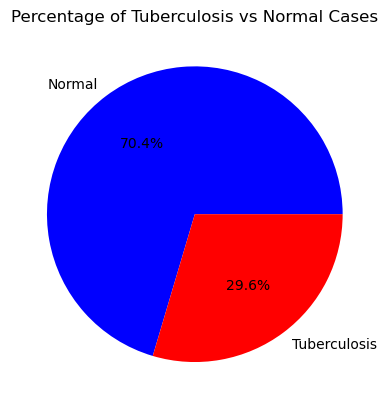

In [28]:
df['Class'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['blue', 'red'])
plt.title("Percentage of Tuberculosis vs Normal Cases")
plt.ylabel("")  
plt.show()


In [31]:
tb_percentage = (df['Class'].value_counts(normalize=True) * 100)
print(tb_percentage)


Class
Normal          70.41
Tuberculosis    29.59
Name: proportion, dtype: float64


In [103]:
#OBJ4-->Feature Correlation & Heatmap  
#  STEP: Correlation Matrix Calculation
# Selecting only numeric features and computing their pairwise correlation.
# This helps identify how strongly different variables (like symptoms and age) are related.

df_numeric = df.select_dtypes(include=['number'])


correlation_matrix = df_numeric.corr()
print(correlation_matrix)


                          Age  Chest_Pain  Cough_Severity  Breathlessness  \
Age                  1.000000    0.011389       -0.006831        0.010089   
Chest_Pain           0.011389    1.000000        0.002662        0.010037   
Cough_Severity      -0.006831    0.002662        1.000000        0.001528   
Breathlessness       0.010089    0.010037        0.001528        1.000000   
Fatigue             -0.000111   -0.000842        0.004340       -0.012442   
Weight_Loss          0.003847   -0.004190        0.003431        0.004343   
Fever                0.008557    0.001512        0.008812        0.002701   
Night_Sweats        -0.007740   -0.007792        0.000807        0.011972   
Sputum_Production    0.011699   -0.006774        0.000105       -0.004621   
Blood_in_Sputum     -0.010304   -0.001754       -0.013498        0.011627   
Previous_TB_History  0.016705   -0.003864       -0.003855       -0.012119   
Class                0.004760    0.010224        0.001116        0.004374   

In [37]:
print(df.columns)


Index(['Patient_ID', 'Age', 'Gender', 'Chest_Pain', 'Cough_Severity',
       'Breathlessness', 'Fatigue', 'Weight_Loss', 'Fever', 'Night_Sweats',
       'Sputum_Production', 'Blood_in_Sputum', 'Smoking_History',
       'Previous_TB_History', 'Class'],
      dtype='object')


In [39]:
print(df['Class'].dtype)


object


In [107]:
#  STEP: Convert Class Labels to Numeric Codes
# Encoding the 'Class' column (e.g., 'Normal', 'TB') as numeric values (0 and 1)
# for easier analysis and compatibility with correlation/plotting functions.

df['Class'] = df['Class'].astype('category').cat.codes


In [109]:
# 📈 STEP: Correlation of All Numeric Features with TB Class
# Recomputing the correlation matrix and sorting the correlation values
# specifically against the 'Class' column to identify which features
# are most positively or negatively

df_numeric = df.select_dtypes(include=['number']) 
correlation_matrix = df_numeric.corr()


tb_correlation = correlation_matrix['Class'].sort_values(ascending=False)
print(tb_correlation)


Class                  1.000000
Chest_Pain             0.010224
Night_Sweats           0.005481
Age                    0.004760
Breathlessness         0.004374
Weight_Loss            0.001548
Cough_Severity         0.001116
Previous_TB_History   -0.000619
Severity_Score        -0.001613
Blood_in_Sputum       -0.003025
Sputum_Production     -0.005185
Fever                 -0.005641
Fatigue               -0.008250
Name: Class, dtype: float64


In [45]:
# Display features most correlated with tuberculosis (Class)
print(tb_correlation)


Class             1.000000
Age               0.004760
Breathlessness    0.004374
Weight_Loss       0.001548
Cough_Severity    0.001116
Fatigue          -0.008250
Name: Class, dtype: float64


In [111]:
# STEP: Compare Average Values of Numeric Features by TB Class
# Grouping the data by 'Class' and calculating the mean for all numeric columns.
# This reveals how symptom severity and other metrics differ between TB and Normal patients.

numeric_cols = df.select_dtypes(include=['number']).columns


tb_trends = df.groupby('Class')[numeric_cols].mean()
print(tb_trends)


             Age  Chest_Pain  Cough_Severity  Breathlessness   Fatigue  \
Class                                                                    
0      53.403352    0.486437        4.489277        1.999432  4.523860   
1      53.619973    0.497634        4.496283        2.013011  4.471781   

       Weight_Loss     Fever  Night_Sweats  Sputum_Production  \
Class                                                           
0         7.450925  1.997231      0.496023            1.99929   
1         7.465644  1.987158      0.502028            1.99003   

       Blood_in_Sputum  Previous_TB_History  Class  Severity_Score  
Class                                                               
0             0.497231             0.503551    0.0       23.939705  
1             0.493917             0.502873    1.0       23.917486  


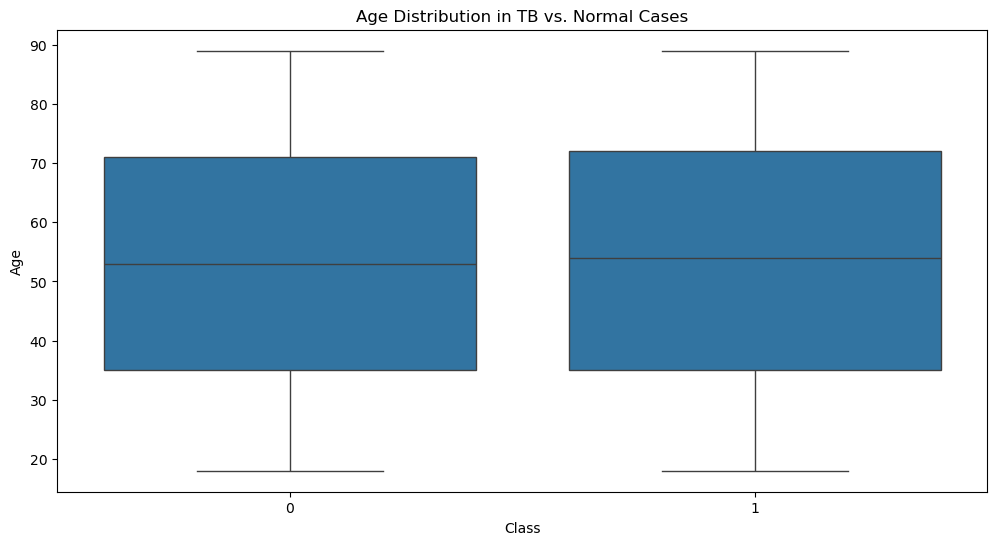

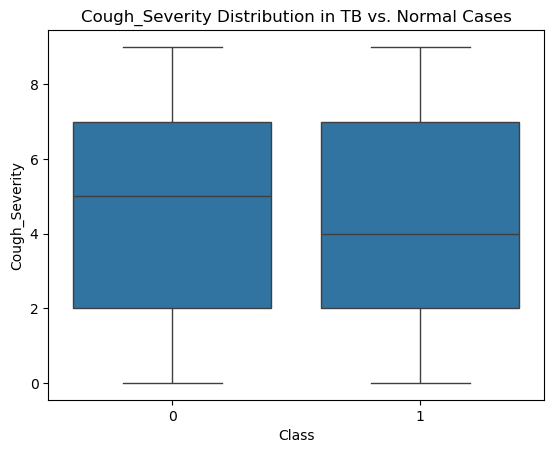

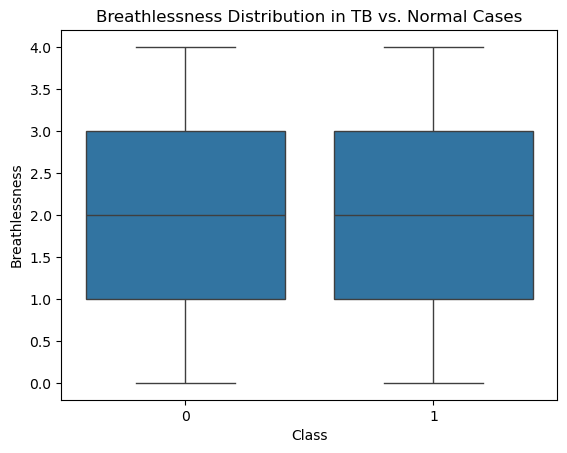

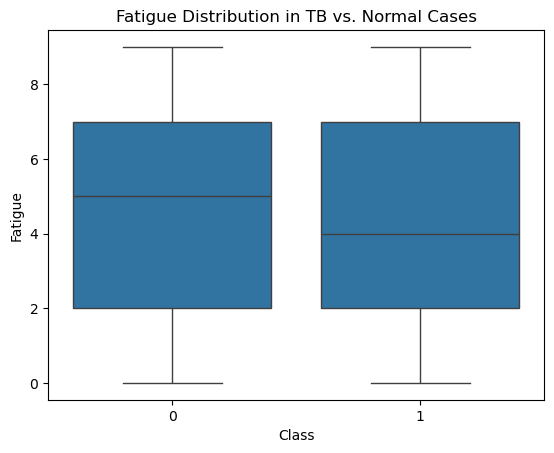

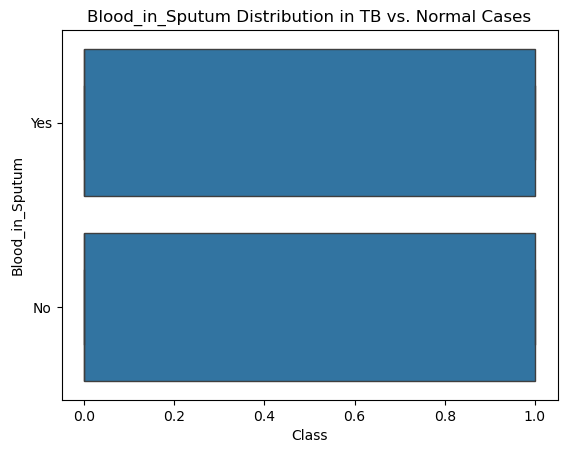

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
for col in ['Age', 'Cough_Severity', 'Breathlessness', 'Fatigue', 'Blood_in_Sputum']:
    sns.boxplot(x=df['Class'], y=df[col])
    plt.title(f"{col} Distribution in TB vs. Normal Cases")
    plt.show()


In [50]:
import pandas as pd

# Assuming 'Class' column contains TB(1) and Normal(0)
age_analysis = df.groupby('Class')['Age'].mean()
print("Average Age by Class:\n", age_analysis)


Average Age by Class:
 Class
0    53.403352
1    53.619973
Name: Age, dtype: float64


In [51]:
symptom_analysis = df.groupby('Class')[['Cough_Severity', 'Breathlessness']].mean()
print("Symptom Severity by Class:\n", symptom_analysis)


Symptom Severity by Class:
        Cough_Severity  Breathlessness
Class                                
0            4.489277        1.999432
1            4.496283        2.013011


In [53]:
early_symptoms = df.groupby('Class')[['Weight_Loss', 'Fatigue']].mean()
print("Early Symptoms by Class:\n", early_symptoms)


Early Symptoms by Class:
        Weight_Loss   Fatigue
Class                       
0         7.450925  4.523860
1         7.465644  4.471781


In [57]:
smoking_analysis = df.groupby('Class')['Smoking_History'].value_counts(normalize=True).unstack()
print("Smoking History Proportion by Class:\n", smoking_analysis)


Smoking History Proportion by Class:
 Smoking_History   Current    Former     Never
Class                                        
0                0.331913  0.337381  0.330706
1                0.324265  0.344711  0.331024


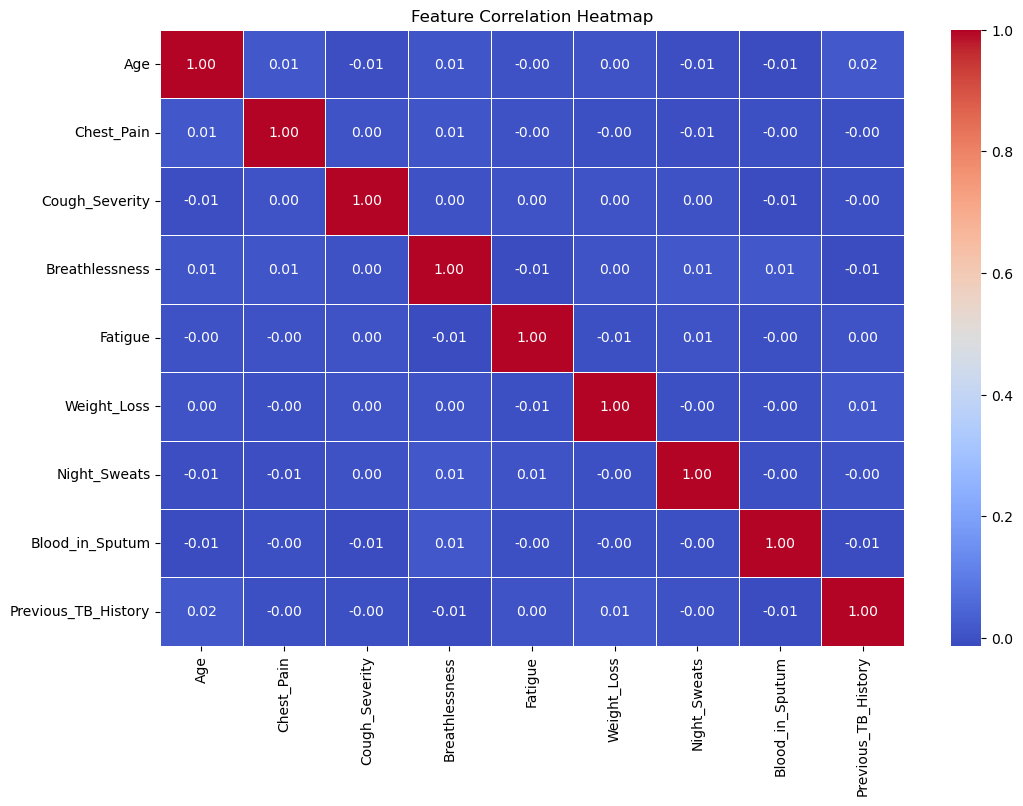

In [59]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset from the correct path
df = pd.read_csv(r"C:\Users\debmr\Downloads\tuberculosis_xray_dataset.csv")
# Step 1: Binary Conversion for 'Yes'/'No' columns
binary_columns = df.select_dtypes(include=['object']).columns
for col in binary_columns:
    if set(df[col].unique()) == {'Yes', 'No'}:
        df[col] = df[col].map({'Yes': 1, 'No': 0})

# Step 2: Compute correlation on numeric columns only
numeric_df = df.select_dtypes(include=['number'])  # Exclude strings like PID
correlation_matrix = numeric_df.corr()

# Step 3: Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


In [61]:
# Check column names
print(df.columns.tolist())


['Patient_ID', 'Age', 'Gender', 'Chest_Pain', 'Cough_Severity', 'Breathlessness', 'Fatigue', 'Weight_Loss', 'Fever', 'Night_Sweats', 'Sputum_Production', 'Blood_in_Sputum', 'Smoking_History', 'Previous_TB_History', 'Class']


In [63]:
# Convert 'Class' column to numeric: Normal = 0, Tuberculosis = 1
df["Class"] = df["Class"].map({"Normal": 0, "Tuberculosis": 1})


In [65]:
#OBJ5-->Grouped Demographic Analysis
# Group by Gender and calculate mean TB rate
gender_tb = df.groupby("Gender")["Class"].mean().reset_index()
print("TB Rate by Gender:")
print(gender_tb)


TB Rate by Gender:
   Gender     Class
0  Female  0.300336
1    Male  0.291613


In [67]:
# Group by Smoking_History and calculate mean TB rate
smoking_tb = df.groupby("Smoking_History")["Class"].mean().reset_index()
print("\nTB Rate by Smoking History:")
print(smoking_tb)



TB Rate by Smoking History:
  Smoking_History     Class
0         Current  0.291066
1          Former  0.300398
2           Never  0.296100


In [69]:
# Group by both Gender and Smoking_History
combined_tb = df.groupby(["Gender", "Smoking_History"])["Class"].mean().unstack()
print("\nTB Rate by Gender and Smoking History:")
print(combined_tb)



TB Rate by Gender and Smoking History:
Smoking_History   Current    Former     Never
Gender                                       
Female           0.299418  0.299605  0.301985
Male             0.282883  0.301143  0.290332


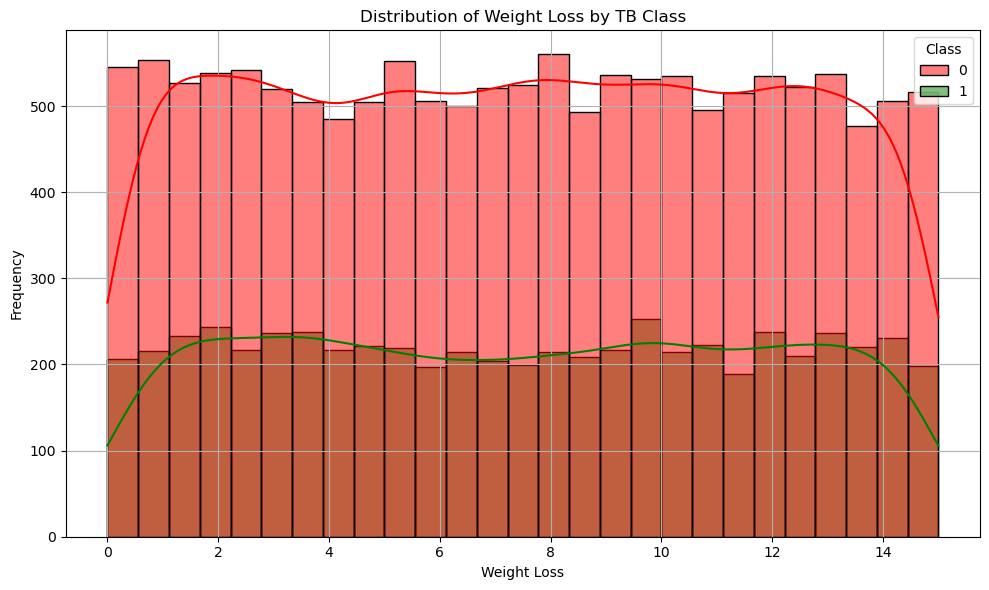

In [71]:
# Alternative: histplot with KDE
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Weight_Loss', hue='Class', kde=True, palette=['red', 'green'])

plt.title('Distribution of Weight Loss by TB Class')
plt.xlabel('Weight Loss')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()


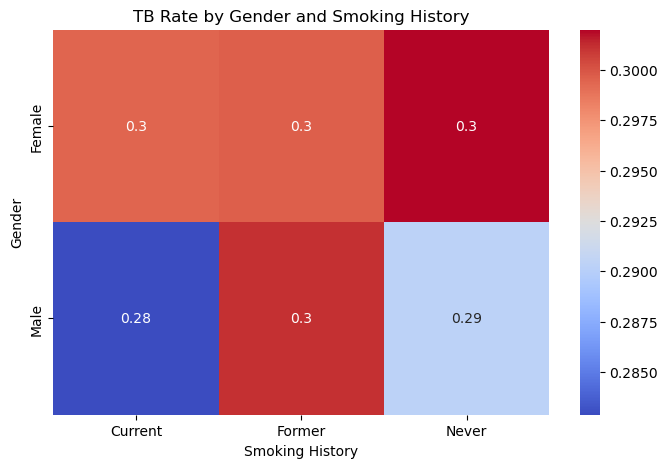

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.heatmap(combined_tb, annot=True, cmap="coolwarm")
plt.title("TB Rate by Gender and Smoking History")
plt.ylabel("Gender")
plt.xlabel("Smoking History")
plt.show()


In [75]:
df.columns


Index(['Patient_ID', 'Age', 'Gender', 'Chest_Pain', 'Cough_Severity',
       'Breathlessness', 'Fatigue', 'Weight_Loss', 'Fever', 'Night_Sweats',
       'Sputum_Production', 'Blood_in_Sputum', 'Smoking_History',
       'Previous_TB_History', 'Class'],
      dtype='object')

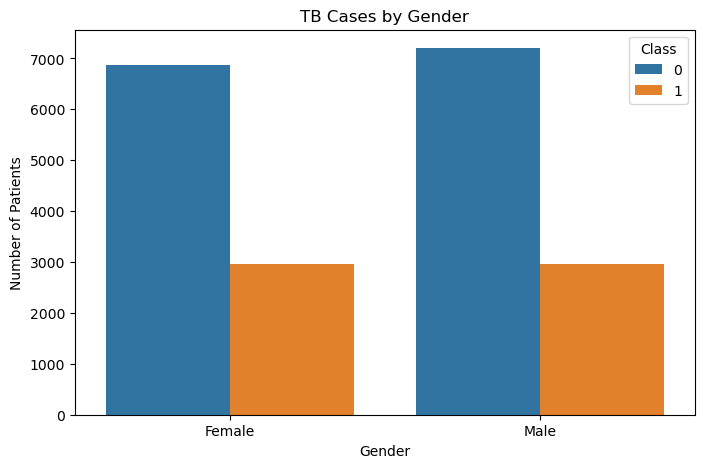

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group by Gender and Class (TB vs. Normal)
gender_tb = df.groupby(['Gender', 'Class']).size().reset_index(name='Count')

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(data=gender_tb, x='Gender', y='Count', hue='Class')
plt.title('TB Cases by Gender')
plt.ylabel('Number of Patients')
plt.xlabel('Gender')
plt.show()


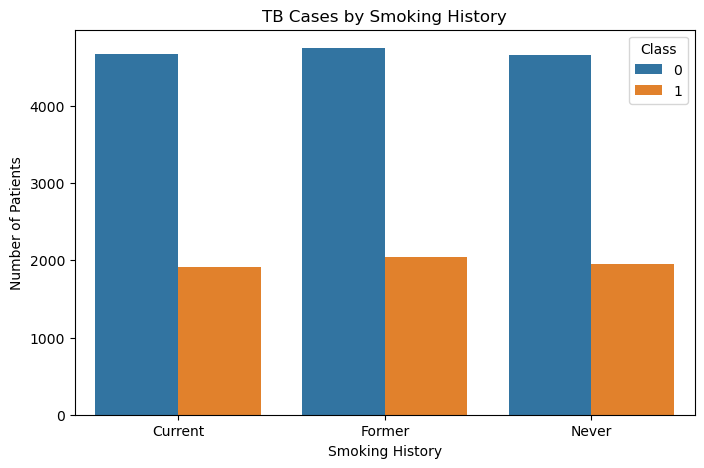

In [79]:
# Group by Smoking History and Class
smoking_tb = df.groupby(['Smoking_History', 'Class']).size().reset_index(name='Count')

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(data=smoking_tb, x='Smoking_History', y='Count', hue='Class')
plt.title('TB Cases by Smoking History')
plt.ylabel('Number of Patients')
plt.xlabel('Smoking History')
plt.show()


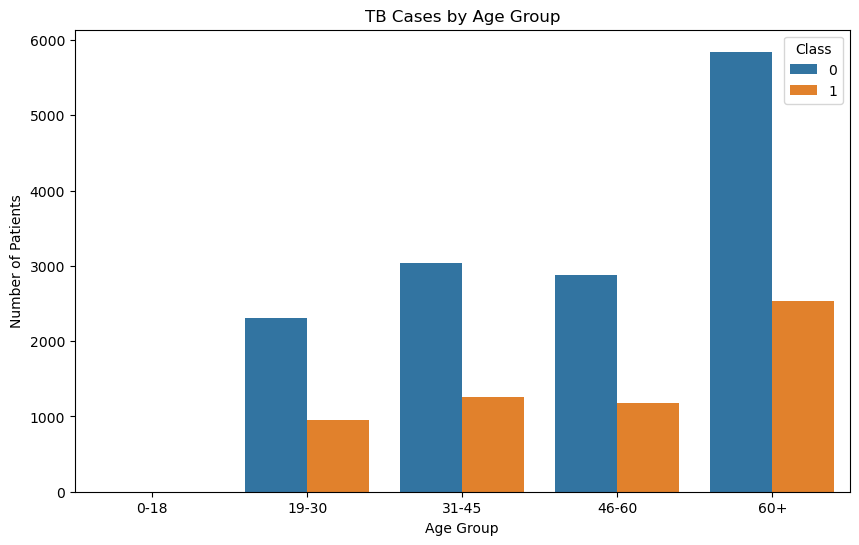

In [81]:
# Create Age Groups
bins = [0, 18, 30, 45, 60, 100]
labels = ['0-18', '19-30', '31-45', '46-60', '60+']
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Group by Age Group and Class
age_tb = df.groupby(['Age_Group', 'Class'], observed=True).size().reset_index(name='Count')

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=age_tb, x='Age_Group', y='Count', hue='Class')
plt.title('TB Cases by Age Group')
plt.ylabel('Number of Patients')
plt.xlabel('Age Group')
plt.show()


In [83]:
#OBJ6-->Feature Engineering – Severity Score
symptom_cols = [
    'Chest_Pain', 'Cough_Severity', 'Breathlessness', 'Fatigue',
    'Weight_Loss', 'Fever', 'Night_Sweats', 'Sputum_Production', 'Blood_in_Sputum'
]

for col in symptom_cols:
    print(f"{col}: {df[col].unique()}")


Chest_Pain: [1 0]
Cough_Severity: [1 3 7 2 0 5 8 9 6 4]
Breathlessness: [2 0 3 1 4]
Fatigue: [3 9 6 5 7 0 1 2 8 4]
Weight_Loss: [ 2.37  6.09  2.86 ...  8.5   6.   13.7 ]
Fever: ['Moderate' 'Mild' 'High']
Night_Sweats: [1 0]
Sputum_Production: ['Medium' 'High' 'Low']
Blood_in_Sputum: [1 0]


In [85]:
# Convert Fever to numeric scale
fever_map = {'Mild': 1, 'Moderate': 2, 'High': 3}
df['Fever'] = df['Fever'].map(fever_map)

# Convert Sputum_Production to numeric scale
sputum_map = {'Low': 1, 'Medium': 2, 'High': 3}
df['Sputum_Production'] = df['Sputum_Production'].map(sputum_map)


In [87]:
# Reuse updated symptom_cols list (now all numeric)
symptom_cols = [
    'Chest_Pain', 'Cough_Severity', 'Breathlessness', 'Fatigue',
    'Weight_Loss', 'Fever', 'Night_Sweats', 'Sputum_Production', 'Blood_in_Sputum'
]

# Create the severity score
df['Severity_Score'] = df[symptom_cols].sum(axis=1)


In [89]:
# Define age bins and labels
bins = [0, 18, 35, 50, 65, 100]
labels = ['Teen', 'Young Adult', 'Middle Age', 'Senior', 'Elderly']

# Create new Age_Group column
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)


In [91]:
#OBJ7-->Top-Risk Patient Identification
top_patients = df.sort_values(by='Severity_Score', ascending=False).head(10)


In [93]:
top_patients[['Patient_ID', 'Age', 'Gender', 'Severity_Score', 'Class']]


,Patient_ID,Age,Gender,Severity_Score,Class
14718,PID014719,65,Female,44.00,0
6353,PID006354,54,Female,43.64,0
16749,PID016750,70,Female,43.00,1
17258,PID017259,38,Female,42.62,0
4145,PID004146,89,Male,42.58,0
5287,PID005288,31,Female,42.24,0
12794,PID012795,47,Male,42.24,0
19115,PID019116,35,Female,42.17,0
17347,PID017348,59,Female,41.88,0
12602,PID012603,47,Male,41.82,0


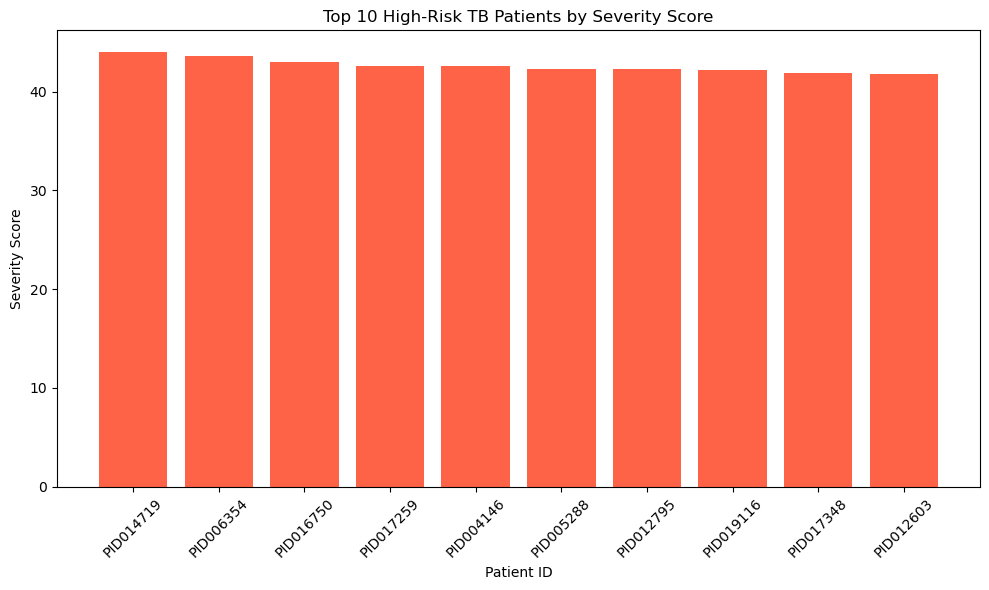

In [95]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(top_patients['Patient_ID'].astype(str), top_patients['Severity_Score'], color='tomato')
plt.xlabel('Patient ID')
plt.ylabel('Severity Score')
plt.title('Top 10 High-Risk TB Patients by Severity Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [97]:
import seaborn as sns


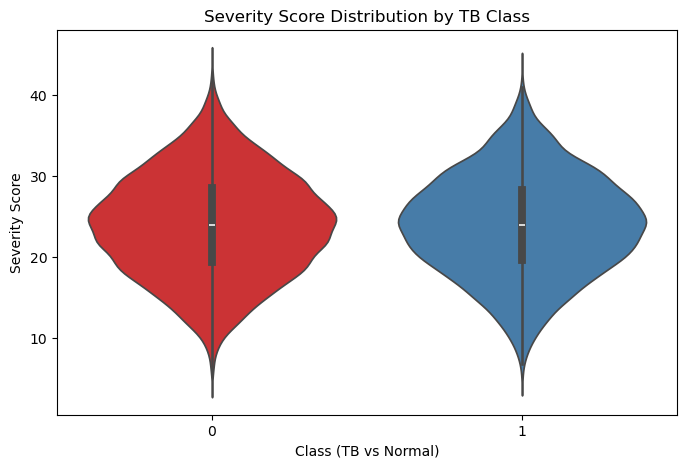

In [99]:
#OBJ8-->Understand distribution/spread of symptoms or age by TB class.
plt.figure(figsize=(8, 5))
sns.violinplot(x='Class', y='Severity_Score', data=df, hue='Class', palette='Set1', legend=False)
plt.title('Severity Score Distribution by TB Class')
plt.xlabel('Class (TB vs Normal)')
plt.ylabel('Severity Score')
plt.show()


In [115]:
from scipy.stats import ttest_ind

# Separate Age values for TB and Normal classes
tb_age = df[df['Class'] == 1]['Age']
normal_age = df[df['Class'] == 0]['Age']

# Perform independent t-test
t_stat, p_val = ttest_ind(tb_age, normal_age)

# Print the result
print(f"T-test on Age (TB vs Normal): t-statistic = {t_stat:.2f}, p-value = {p_val:.4f}")
if p_val < 0.05:
    print(" Statistically significant difference in Age between TB and Normal groups.")
else:
    print(" No significant difference in Age between TB and Normal groups.")


T-test on Age (TB vs Normal): t-statistic = 0.67, p-value = 0.5009
 No significant difference in Age between TB and Normal groups.
